# Task 1: Sentiment Classifier with Neural Network

*In this notebook I am going to utilize neural networks to classify movie reviews as negative or positive, based on data from the IMDB reviews dataset.*

---

## Defining data sets

*For the purpose of utlizing the data with neural networks, I will load the data using the Keras IMDB loading*

In [1]:
from tensorflow.keras.datasets import imdb
import os

2023-11-26 23:59:01.119071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
imdb_data = imdb.load_data(path="imdb.npz",
                           num_words=None,
                           skip_top=0,
                           maxlen=None,
                           seed=113,
                           start_char=start_char,
                           oov_char=oov_char,
                           index_from=index_from)
(x_train, y_train), (x_test, y_test) = imdb_data



In [3]:
####################### Begin
# This code is borrowed from the keras.datasets.imdb documentation
####################### Begin

# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

####################### End
# This code is written by me
# Creating a function to get the sentence from a specific entry in `x_train` or `x_test`

# Create a function to get the sentence from an entry in the data set
def get_sentence_from_indices(indices: list) -> str:
    """
    Get the sentence from a list of indices.

    param indices: list(int)
        List of word indices. Found in `x_train` or `x_test`.
    return: str
        Sentence obtained from mapping indices to words.
    """
    filter = lambda i: i not in [start_char, oov_char] and inverted_word_index[i] != "br"
    return " ".join((inverted_word_index[i] for i in indices if filter(i)))

# Testing with an example
print(get_sentence_from_indices(x_train[0]))
print(get_sentence_from_indices(x_test[0]))

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be p

*With the data loaded, the first step is to vectorize the text. Here I am using scikit-learn's CountVectorizer to vectorize the texts*.

In [4]:
# Vectorize the imdb data with scikit-learn's CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, stop_words='english')

texts = [get_sentence_from_indices(x) for x in x_train]
vectorizer.fit(texts)

# Vectorize the training and test sets
X_train = vectorizer.transform([get_sentence_from_indices(x) for x in x_train])
X_test = vectorizer.transform([get_sentence_from_indices(x) for x in x_test])

print(X_train.shape)


(25000, 1556)


---
## Implementing into models

I will implement classifiers using two libraries, both the scikit-learn library and the keras library from tensorflow. The model implementations will be scikit-learn's `MLPClassifier`, as well as the `Sequential` from Keras with `Dense` layers.

##### `MLPClassifier` implementation

In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

*The task said that GridSearchCV was not necessary. However, out of curiosity I am attempting to utilize the tool in this solution. The different params in the parameter grid I am using for the GridSearchCV process is based on the documentation for MLPClassifier at [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).*

*By using GridSearchCV, I can automatically search through all possible combinations of these parameters and find the best combination that maximizes the model's performance.*


---
###### Note: you do not have to run the GridSearchCV as this is time intensive. The results are stated further down.
---

In [138]:
# Identifying the best parameters for the MLPClassifier
# Create the parameter grid based on the results of random search
params = {
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [1e-4, 1e-3, 1e-2],
}

# Create a base model
mlp = MLPClassifier(max_iter=100, random_state=12)

# Instantiate the grid search model
# n_jobs=-1 to use all processors
# cv=3 to use 3-fold cross validation
grid_search = GridSearchCV(estimator=mlp, param_grid=params,
                           cv=3, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatic

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=12),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01]},
             verbose=1)

In [139]:
print(grid_search.best_params_)

{'activation': 'relu', 'alpha': 0.0001}


I have ran some iterations with GridSearchCV with different param grids: 

- Iteration 1 (max iterations capped to 20):
    - *{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}*
- Iteration 2 (max iterations capped to 100):
    - *{'activation': 'relu', 'alpha': 0.0001}*



*Training the model with the identified best params*

In [145]:
# Create a new MLPClassifier with the best parameters
best_params = {'activation': 'relu', 'alpha': 0.001} # grid_search.best_params_
mlp = MLPClassifier(**best_params, max_iter=1000, random_state=12)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=12)

*Printing the accuracy of the model*

In [146]:
# Predicting the test set results
y_pred = mlp.predict(X_test)
y_pred_train = mlp.predict(X_train)

# Print the accuracy scores
from sklearn.metrics import accuracy_score
print("Training set accuracy score:", accuracy_score(y_train, y_pred_train))
print("Test set accuracy score:", accuracy_score(y_test, y_pred))

Training set accuracy score: 1.0
Test set accuracy score: 0.85684


##### Keras with `Sequential` implementation

*I will now create a neural network for the same classification with Keras*

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [70]:
print(X_train.shape)

(25000, 1556)


- *Using L1 regularization to prevent overfitting.*
- *Using dropout to prevent overfitting. This works because dropout randomly sets a fraction of input units to 0 at each update during training time.*
- *Using sigmoid activation function for the output layer since we are doing binary classification*

In [84]:
architectures = [
    [Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
        Dropout(0.5),
        Dense(32, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
        Dense(2, activation='sigmoid')
     ],

    [Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dropout(0.5),
        Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dropout(0.5),
        Dense(2, activation='sigmoid')
    ],
]

In [85]:
model = Sequential(architectures[1])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               199296    
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 2)               

Compiling the method

In [89]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


782/782 [==============================] - 4s 4ms/step - loss: 1.0592 - accuracy: 0.5348 - val_loss: 1.0242 - val_accuracy: 0.6595
Epoch 2/30
782/782 [==============================] - 3s 3ms/step - loss: 0.9978 - accuracy: 0.6218 - val_loss: 0.9224 - val_accuracy: 0.7622
Epoch 3/30
782/782 [==============================] - 3s 3ms/step - loss: 0.9178 - accuracy: 0.7072 - val_loss: 0.8116 - val_accuracy: 0.8083
Epoch 4/30
782/782 [==============================] - 3s 3ms/step - loss: 0.8385 - accuracy: 0.7688 - val_loss: 0.7390 - val_accuracy: 0.8291
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 0.7819 - accuracy: 0.7982 - val_loss: 0.6917 - val_accuracy: 0.8416
Epoch 6/30
782/782 [==============================] - 3s 3ms/step - loss: 0.7369 - accuracy: 0.8194 - val_loss: 0.6624 - val_accuracy: 0.8485
Epoch 7/30
782/782 [==============================] - 3s 3ms/step - loss: 0.6977 - accuracy: 0.8384 - val_loss: 0.6401 - val_accuracy: 0.8534
Epoch 8/30
782/78

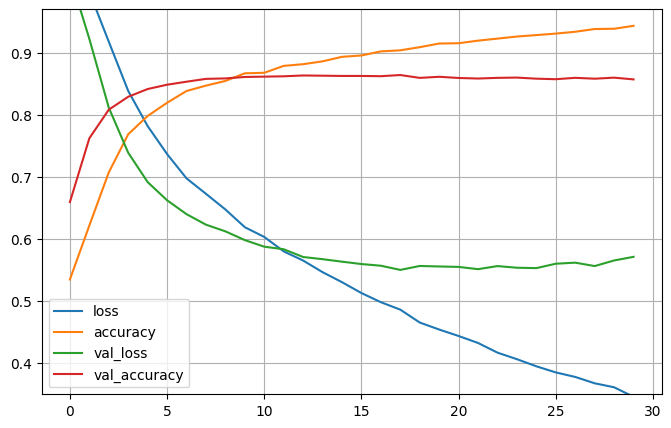

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.35, 0.97)
plt.show()